In [2]:
import pandas as pd

df = pd.read_csv('post_data/DJI0kEQBLTg.csv')
df.head()

,post_shortcode,commenter_username,comment_text,comment_likes
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418


In [4]:
df.shape

(848, 4)

In [6]:
df.dtypes

post_shortcode        object
commenter_username    object
comment_text          object
comment_likes          int64
dtype: object

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gadwi\AppData\Roaming\nltk_data...


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiment_scores = df.comment_text.apply(ps)
sentiment_scores.head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: comment_text, dtype: object

In [10]:
sentiment_df = pd.DataFrame(sentiment_scores.tolist())
sentiment_df.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,0.871,0.129,0.6369
2,0.0,1.000,0.000,0.0000
3,0.0,1.000,0.000,0.0000
4,0.0,1.000,0.000,0.0000


In [11]:
labelize = lambda x : 0 if x==0 else(1 if x>0 else -1)
sentiment_df['klasifikasi'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,klasifikasi
0,0.0,1.000,0.000,0.0000,0
1,0.0,0.871,0.129,0.6369,1
2,0.0,1.000,0.000,0.0000,0
3,0.0,1.000,0.000,0.0000,0
4,0.0,1.000,0.000,0.0000,0


In [14]:
data = df.join(sentiment_df.klasifikasi)
data.head()

,post_shortcode,commenter_username,comment_text,comment_likes,klasifikasi
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493,0
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396,1
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66,0
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2,0
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418,0


In [15]:
data['klasifikasi'].value_counts()

klasifikasi
 0    804
 1     39
-1      5
Name: count, dtype: int64

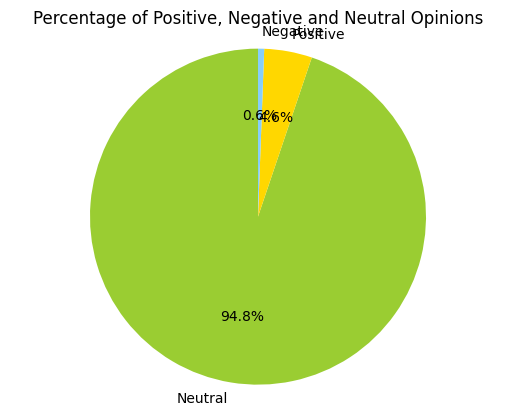

In [17]:

import matplotlib.pyplot as plt

labels = ['Neutral', 'Positive', 'Negative']
quantity = [804, 39, 5]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.title('Percentage of Positive, Negative and Neutral Opinions')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

In [20]:
import re
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenization(comment_text):
    comment_text = word_tokenize(comment_text)
    return comment_text

data['tokenization'] = data['comment_text'].apply(lambda x: tokenization(x))
data.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gadwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,post_shortcode,commenter_username,comment_text,comment_likes,klasifikasi,tokenization
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493,0,"[Sebagai, alumni, yang, pernah, mengikuti, pro..."
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396,1,"[IISMA, mungkin, banyak, pro-kontra, ya, ,, cu..."
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66,0,"[RIP, Studi, Independen, :, broken_heart, :, S..."
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2,0,"[PLSS, BALIKIN, PMM, :, loudly_crying_face, :,..."
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418,0,"[Bye, bye, merdeka, belajar, ,, beruntung, bis..."


In [22]:
print(data.comment_text[0])
print(data.tokenization[0])

Sebagai alumni yang pernah mengikuti program PMM dan MSIB, saya merasa sangat prihatin dan kecewa atas keputusan dihapusnya dua program tersebut. Bagi saya, PMM dan MSIB bukan sekadar program kampus merdeka, tetapi merupakan ruang pembelajaran nyata yang berdampak besar pada pengembangan diri, wawasan kebangsaan, serta kesiapan karier mahasiswa.
Melalui PMM, saya belajar memahami keberagaman Indonesia dengan merasakan langsung kehidupan kampus di daerah lain, menjalin persahabatan lintas budaya, serta mengasah empati dan toleransi. Sedangkan melalui MSIB, saya mendapat kesempatan berharga untuk terjun langsung ke dunia industri, menerapkan ilmu di lapangan, dan membangun jejaring profesional yang sampai hari ini masih bermanfaat.
Penghapusan program ini bukan hanya kehilangan bagi mahasiswa, tetapi juga sebuah kemunduran dalam upaya mempersiapkan generasi muda yang adaptif, kolaboratif, dan siap menghadapi tantangan global. Saya berharap pemerintah dan pemangku kebijakan dapat memperti

In [36]:
def normalization(text):
    text = re.sub(r'[\#\@\!]\w+', '', text) #removing # and @
    text = re.sub('[\d+]','',text) #removing numbers
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r':[a-zA-Z0-9_]+:', '', text) #removing emoticons
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) #removing urls 
    text = re.sub(r'[\.\,\;\!\?\*$\"\'\:]', '', text) #removing some non-sense characters
    text = text.lower()
    return text

data['normalization'] = data['comment_text'].transform(normalization).apply(lambda x: tokenization(x))
data.head()

,post_shortcode,commenter_username,comment_text,comment_likes,klasifikasi,tokenization,normalization,menghapus_emoji
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493,0,"[Sebagai, alumni, yang, pernah, mengikuti, pro...","[sebagai, alumni, yang, pernah, mengikuti, pro...","[[, 'sebagai, ', ,, 'alumni, ', ,, 'yang, ', ,..."
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396,1,"[IISMA, mungkin, banyak, pro-kontra, ya, ,, cu...","[iisma, mungkin, banyak, pro-kontra, ya, cuma,...","[[, 'iisma, ', ,, 'mungkin, ', ,, 'banyak, ', ..."
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66,0,"[RIP, Studi, Independen, :, broken_heart, :, S...","[rip, studi, independen, sebagai, alumni, stup...","[[, 'rip, ', ,, 'studi, ', ,, 'independen, ', ..."
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2,0,"[PLSS, BALIKIN, PMM, :, loudly_crying_face, :,...","[plss, balikin, pmm, wishlist, aku, bgt, dari,...","[[, 'plss, ', ,, 'balikin, ', ,, 'pmm, ', ,, '..."
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418,0,"[Bye, bye, merdeka, belajar, ,, beruntung, bis...","[bye, bye, merdeka, belajar, beruntung, bisa, ...","[[, 'bye, ', ,, 'bye, ', ,, 'merdeka, ', ,, 'b..."


In [38]:
print(data.comment_text[3])
print(data.normalization[3])

PLSS BALIKIN PMM :loudly_crying_face:, WISHLIST AKU BGT ,Dari awal maba kmrn udh bertekad nyiapin diri buat nantinya coba menjadi bagian PMM , syg bgt dihapuss :face_holding_back_tears::broken_heart:, sedii sekaliii
['plss', 'balikin', 'pmm', 'wishlist', 'aku', 'bgt', 'dari', 'awal', 'maba', 'kmrn', 'udh', 'bertekad', 'nyiapin', 'diri', 'buat', 'nantinya', 'coba', 'menjadi', 'bagian', 'pmm', 'syg', 'bgt', 'dihapuss', 'sedii', 'sekaliii']


In [39]:
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')
stop = set(stopwords.words('indonesian'))
punctuation = list(string.punctuation)
stop.update(punctuation)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [44]:
def stopWords(text):
    text = " ".join(word for word in text if word not in stop)
    return text

data['stopwords'] = data['normalization'].transform(stopWords).apply(lambda x: tokenization(x))
data.head()

,post_shortcode,commenter_username,comment_text,comment_likes,klasifikasi,tokenization,normalization,menghapus_emoji,stopwords
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493,0,"[Sebagai, alumni, yang, pernah, mengikuti, pro...","[sebagai, alumni, yang, pernah, mengikuti, pro...","[[, 'sebagai, ', ,, 'alumni, ', ,, 'yang, ', ,...","[alumni, mengikuti, program, pmm, msib, prihat..."
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396,1,"[IISMA, mungkin, banyak, pro-kontra, ya, ,, cu...","[iisma, mungkin, banyak, pro-kontra, ya, cuma,...","[[, 'iisma, ', ,, 'mungkin, ', ,, 'banyak, ', ...","[iisma, pro-kontra, ya, pmm, sayang, dihilangk..."
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66,0,"[RIP, Studi, Independen, :, broken_heart, :, S...","[rip, studi, independen, sebagai, alumni, stup...","[[, 'rip, ', ,, 'studi, ', ,, 'independen, ', ...","[rip, studi, independen, alumni, stupen, perio..."
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2,0,"[PLSS, BALIKIN, PMM, :, loudly_crying_face, :,...","[plss, balikin, pmm, wishlist, aku, bgt, dari,...","[[, 'plss, ', ,, 'balikin, ', ,, 'pmm, ', ,, '...","[plss, balikin, pmm, wishlist, bgt, maba, kmrn..."
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418,0,"[Bye, bye, merdeka, belajar, ,, beruntung, bis...","[bye, bye, merdeka, belajar, beruntung, bisa, ...","[[, 'bye, ', ,, 'bye, ', ,, 'merdeka, ', ,, 'b...","[bye, bye, merdeka, belajar, beruntung, era, m..."


In [45]:
print(data.comment_text[0])
print(data.stopwords[0])

Sebagai alumni yang pernah mengikuti program PMM dan MSIB, saya merasa sangat prihatin dan kecewa atas keputusan dihapusnya dua program tersebut. Bagi saya, PMM dan MSIB bukan sekadar program kampus merdeka, tetapi merupakan ruang pembelajaran nyata yang berdampak besar pada pengembangan diri, wawasan kebangsaan, serta kesiapan karier mahasiswa.
Melalui PMM, saya belajar memahami keberagaman Indonesia dengan merasakan langsung kehidupan kampus di daerah lain, menjalin persahabatan lintas budaya, serta mengasah empati dan toleransi. Sedangkan melalui MSIB, saya mendapat kesempatan berharga untuk terjun langsung ke dunia industri, menerapkan ilmu di lapangan, dan membangun jejaring profesional yang sampai hari ini masih bermanfaat.
Penghapusan program ini bukan hanya kehilangan bagi mahasiswa, tetapi juga sebuah kemunduran dalam upaya mempersiapkan generasi muda yang adaptif, kolaboratif, dan siap menghadapi tantangan global. Saya berharap pemerintah dan pemangku kebijakan dapat memperti

In [46]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gadwi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gadwi\AppData\Roaming\nltk_data...


True

In [47]:
lemma = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [lemma.lemmatize(word) for word in text]
    return text

data['lemmatization'] = data['stopwords'].transform(lemmatizer).apply(lambda x: lemmatizer(x))
data.head()

,post_shortcode,commenter_username,comment_text,comment_likes,klasifikasi,tokenization,normalization,menghapus_emoji,stopwords,lemmatization
0,DJI0kEQBLTg,<Profile alfianmktifjr (49285862141)>,Sebagai alumni yang pernah mengikuti program P...,1493,0,"[Sebagai, alumni, yang, pernah, mengikuti, pro...","[sebagai, alumni, yang, pernah, mengikuti, pro...","[[, 'sebagai, ', ,, 'alumni, ', ,, 'yang, ', ,...","[alumni, mengikuti, program, pmm, msib, prihat...","[alumnus, mengikuti, program, pmm, msib, priha..."
1,DJI0kEQBLTg,<Profile nam_dosen (4198347476)>,"IISMA mungkin banyak pro-kontra ya, cuma PMM i...",396,1,"[IISMA, mungkin, banyak, pro-kontra, ya, ,, cu...","[iisma, mungkin, banyak, pro-kontra, ya, cuma,...","[[, 'iisma, ', ,, 'mungkin, ', ,, 'banyak, ', ...","[iisma, pro-kontra, ya, pmm, sayang, dihilangk...","[iisma, pro-kontra, ya, pmm, sayang, dihilangk..."
2,DJI0kEQBLTg,<Profile belajarcarabelajar (12256352655)>,RIP Studi Independen :broken_heart: Sebagai al...,66,0,"[RIP, Studi, Independen, :, broken_heart, :, S...","[rip, studi, independen, sebagai, alumni, stup...","[[, 'rip, ', ,, 'studi, ', ,, 'independen, ', ...","[rip, studi, independen, alumni, stupen, perio...","[rip, studi, independen, alumnus, stupen, peri..."
3,DJI0kEQBLTg,<Profile _wldn.p_ (13024605988)>,"PLSS BALIKIN PMM :loudly_crying_face:, WISHLIS...",2,0,"[PLSS, BALIKIN, PMM, :, loudly_crying_face, :,...","[plss, balikin, pmm, wishlist, aku, bgt, dari,...","[[, 'plss, ', ,, 'balikin, ', ,, 'pmm, ', ,, '...","[plss, balikin, pmm, wishlist, bgt, maba, kmrn...","[plss, balikin, pmm, wishlist, bgt, maba, kmrn..."
4,DJI0kEQBLTg,<Profile yudikramdani (13710118382)>,"Bye bye merdeka belajar, beruntung bisa menjad...",418,0,"[Bye, bye, merdeka, belajar, ,, beruntung, bis...","[bye, bye, merdeka, belajar, beruntung, bisa, ...","[[, 'bye, ', ,, 'bye, ', ,, 'merdeka, ', ,, 'b...","[bye, bye, merdeka, belajar, beruntung, era, m...","[bye, bye, merdeka, belajar, beruntung, era, m..."


In [49]:

print(data.comment_text[0])
print(data.lemmatization[0])

Sebagai alumni yang pernah mengikuti program PMM dan MSIB, saya merasa sangat prihatin dan kecewa atas keputusan dihapusnya dua program tersebut. Bagi saya, PMM dan MSIB bukan sekadar program kampus merdeka, tetapi merupakan ruang pembelajaran nyata yang berdampak besar pada pengembangan diri, wawasan kebangsaan, serta kesiapan karier mahasiswa.
Melalui PMM, saya belajar memahami keberagaman Indonesia dengan merasakan langsung kehidupan kampus di daerah lain, menjalin persahabatan lintas budaya, serta mengasah empati dan toleransi. Sedangkan melalui MSIB, saya mendapat kesempatan berharga untuk terjun langsung ke dunia industri, menerapkan ilmu di lapangan, dan membangun jejaring profesional yang sampai hari ini masih bermanfaat.
Penghapusan program ini bukan hanya kehilangan bagi mahasiswa, tetapi juga sebuah kemunduran dalam upaya mempersiapkan generasi muda yang adaptif, kolaboratif, dan siap menghadapi tantangan global. Saya berharap pemerintah dan pemangku kebijakan dapat memperti

In [50]:
lemma = data['lemmatization'].astype(str)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore')
tfidf_matrix = tfidf.fit_transform(lemma)

In [52]:
print(tfidf.vocabulary_)

{'alumnus': 44, 'mengikuti': 789, 'program': 1071, 'pmm': 1043, 'msib': 834, 'prihatin': 1063, 'kecewa': 576, 'keputusan': 614, 'dihapusnya': 278, 'kampus': 548, 'merdeka': 808, 'ruang': 1117, 'pembelajaran': 972, 'nyata': 916, 'berdampak': 130, 'pengembangan': 984, 'wawasan': 1371, 'kebangsaan': 566, 'kesiapan': 621, 'karier': 551, 'mahasiswa': 732, 'belajar': 116, 'memahami': 763, 'keberagaman': 570, 'indonesia': 487, 'merasakan': 807, 'langsung': 682, 'kehidupan': 582, 'daerah': 229, 'menjalin': 795, 'persahabatan': 1017, 'lintas': 705, 'budaya': 199, 'mengasah': 782, 'empati': 340, 'toleransi': 1312, 'kesempatan': 619, 'berharga': 141, 'terjun': 1278, 'dunia': 333, 'industri': 488, 'menerapkan': 777, 'ilmu': 477, 'lapangan': 684, 'membangun': 765, 'jejaring': 520, 'profesional': 1069, 'bermanfaat': 147, 'penghapusan': 989, 'kehilangan': 583, 'kemunduran': 606, 'upaya': 1353, 'generasi': 397, 'muda': 841, 'adaptif': 13, 'kolaboratif': 651, 'menghadapi': 786, 'tantangan': 1252, 'glob

In [53]:
print(lemma[0])
print(tfidf_matrix[0])

['alumnus', 'mengikuti', 'program', 'pmm', 'msib', 'prihatin', 'kecewa', 'keputusan', 'dihapusnya', 'program', 'pmm', 'msib', 'program', 'kampus', 'merdeka', 'ruang', 'pembelajaran', 'nyata', 'berdampak', 'pengembangan', 'wawasan', 'kebangsaan', 'kesiapan', 'karier', 'mahasiswa', 'pmm', 'belajar', 'memahami', 'keberagaman', 'indonesia', 'merasakan', 'langsung', 'kehidupan', 'kampus', 'daerah', 'menjalin', 'persahabatan', 'lintas', 'budaya', 'mengasah', 'empati', 'toleransi', 'msib', 'kesempatan', 'berharga', 'terjun', 'langsung', 'dunia', 'industri', 'menerapkan', 'ilmu', 'lapangan', 'membangun', 'jejaring', 'profesional', 'bermanfaat', 'penghapusan', 'program', 'kehilangan', 'mahasiswa', 'kemunduran', 'upaya', 'generasi', 'muda', 'adaptif', 'kolaboratif', 'menghadapi', 'tantangan', 'global', 'berharap', 'pemerintah', 'pemangku', 'kebijakan', 'mempertimbangkan', 'keputusan', 'program', 'pmm', 'msib', 'kontribusi', 'nyata', 'mencetak', 'sumber', 'daya', 'manusia', 'unggul', 'indonesia']

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

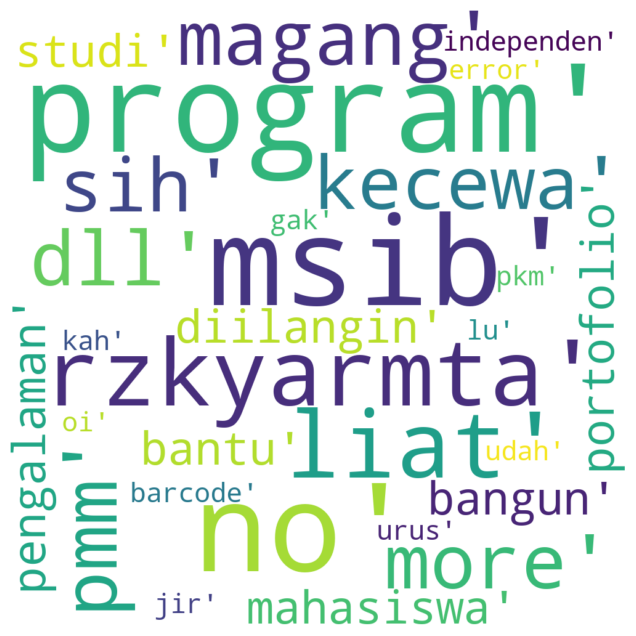

In [55]:
neg_comment = data[data.klasifikasi == -1]
neg_string = []
for t in neg_comment['lemmatization'].astype(str):
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000, max_font_size=200 ,background_color='white').generate(neg_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

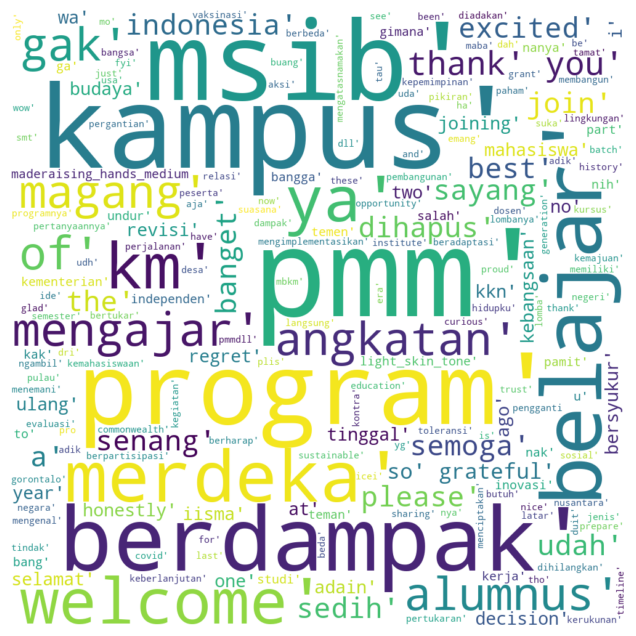

In [56]:
pos_comment = data[data.klasifikasi == 1]
pos_string = []
for t in pos_comment['lemmatization'].astype(str):
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000, max_font_size=200, background_color='white').generate(pos_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

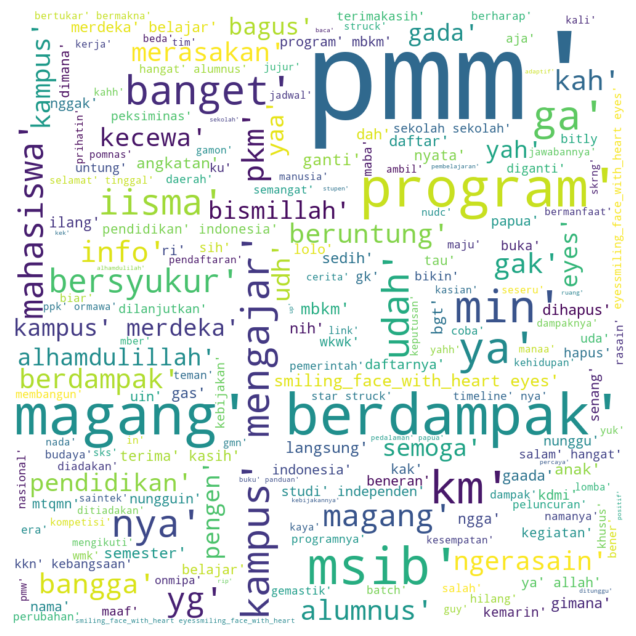

In [57]:
net_comment = data[data.klasifikasi == 0]
net_string = []
for t in net_comment['lemmatization'].astype(str):
    net_string.append(t)
net_string = pd.Series(net_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1000, height=1000,max_font_size=200, background_color='white').generate(net_string)
plt.figure(figsize=(8,8), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics
import numpy as np


# get X and y
df_X = tfidf_matrix
df_y = data['klasifikasi']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)


# Model Learning
mlp1= MLPClassifier(hidden_layer_sizes=(61), alpha=0.2, activation='logistic')
mlp1.fit(X_train, y_train)

y_pred_tr = mlp1.predict(X_train)
y_pred_ts = mlp1.predict(X_test)

# Performance training
print('=== Multilayer Perceptron Performance Training ===\n')
print('Accuracy :', metrics.accuracy_score(y_train, y_pred_tr))
print('Precision :', metrics.precision_score(y_train, y_pred_tr, average='macro', labels=np.unique(y_pred_tr)))
print('Recall :', metrics.recall_score(y_train, y_pred_tr, average='macro'))
print('Confuse Matrix Train:\n', confusion_matrix(y_train, y_pred_tr))
print('-------------------------------------------------------------------')

# Performance testing
print('=== Multilayer Perceptron Performance Testing ===\n')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_ts))
print('Precision :', metrics.precision_score(y_test, y_pred_ts, average='macro', labels=np.unique(y_pred_ts)))
print('Recall :', metrics.recall_score(y_test, y_pred_ts, average='macro'))
print('Confuse Matrix Test:\n', confusion_matrix(y_test, y_pred_ts))

=== Multilayer Perceptron Performance Training ===

Accuracy : 0.9462647444298821
Precision : 0.9462647444298821
Recall : 0.3333333333333333
Confuse Matrix Train:
 [[  0   5   0]
 [  0 722   0]
 [  0  36   0]]
-------------------------------------------------------------------
=== Multilayer Perceptron Performance Testing ===

Accuracy : 0.9647058823529412
Precision : 0.9647058823529412
Recall : 0.5
Confuse Matrix Test:
 [[82  0]
 [ 3  0]]
